In [197]:
xyhwd = []
with open("../to_calib.txt", "r") as f:
    for line in f.readlines():
        point = [p.strip() for p in line.split(",")]
        xyhwd.append(point)
        

In [279]:
import numpy as np
import pandas as pd

In [199]:
xyhwd = np.array(xyhwd)

In [200]:
w = xyhwd[:, 2]
h = xyhwd[:, 3]
d = xyhwd[:, 4]

In [201]:
w = w.astype(np.float32)
h = h.astype(np.float32)
d = d.astype(np.float32)

In [202]:
r = (w**2+h**2)**(0.5)

In [203]:
fr = (r*d)/5
fw = (w*d)/3
fh = (h*d)/4

In [204]:
import matplotlib.pyplot as plt
from scipy import interpolate

In [205]:
r_interp_fn = np.polyfit(np.log(d), r, 3)
r_interp_fn = np.poly1d(r_interp_fn)

w_interp_fn = np.polyfit(np.log(d), w, 3)
w_interp_fn = np.poly1d(w_interp_fn)

h_interp_fn = np.polyfit(np.log(d), h, 3)
h_interp_fn = np.poly1d(h_interp_fn)

In [206]:
r_interp = r_interp_fn(np.log(np.arange(8, 200)))
w_interp = w_interp_fn(np.log(np.arange(8, 200)))
h_interp = h_interp_fn(np.log(np.arange(8, 200)))

In [207]:
r_mask = r_interp >= 0
w_mask = w_interp >= 0
h_mask = h_interp >= 0

In [208]:
r_interp = r_interp[r_mask]
w_interp = w_interp[w_mask]
h_interp = h_interp[h_mask]

In [209]:
x_r = np.arange(8, 200)[r_mask]
x_w = np.arange(8, 200)[w_mask]
x_h = np.arange(8, 200)[h_mask]

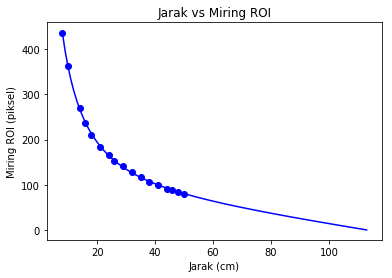

In [295]:
plt.plot(d, r, "bo", x_r, r_interp, "b")
plt.title("Jarak vs Miring ROI")
plt.xlabel("Jarak (cm)")
plt.ylabel("Miring ROI (piksel)")
plt.savefig("miring.png")

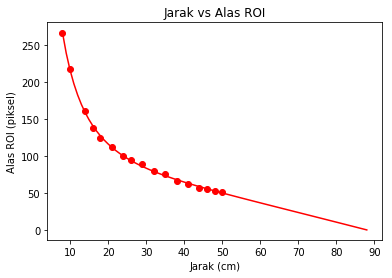

In [296]:
plt.plot(d, w, "ro", x_w, w_interp, "r")
plt.title("Jarak vs Alas ROI")
plt.xlabel("Jarak (cm)")
plt.ylabel("Alas ROI (piksel)")
plt.savefig("alas.png")

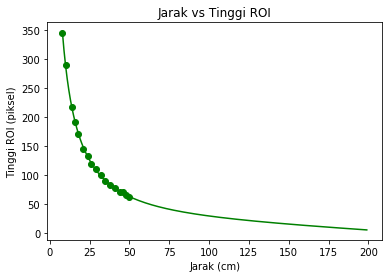

In [218]:
plt.plot(d, h, "go", x_h, h_interp, "g")
plt.title("Jarak vs Tinggi ROI")
plt.xlabel("Jarak (cm)")
plt.ylabel("Tinggi ROI (piksel)")
plt.savefig("tinggi.png")

In [274]:
fr_interp_fn = np.polyfit(np.log(d), fr, 3)
fr_interp_fn = np.poly1d(fr_interp_fn)

fw_interp_fn = np.polyfit(np.log(d), fw, 3)
fw_interp_fn = np.poly1d(fw_interp_fn)

fh_interp_fn = np.polyfit(np.log(d), fh, 3)
fh_interp_fn = np.poly1d(fh_interp_fn)

In [275]:
fr_interp = fr_interp_fn(np.log(np.arange(8, 200)))
fw_interp = fw_interp_fn(np.log(np.arange(8, 200)))
fh_interp = fh_interp_fn(np.log(np.arange(8, 200)))

In [276]:
fr_interp = fr_interp[r_mask]

In [277]:
x_fr = np.arange(8, 200)[r_mask]

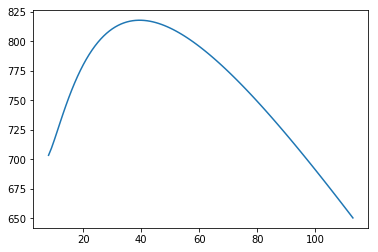

In [278]:
plt.plot(x_fr, fr_interp)

In [284]:
w_df = pd.DataFrame(data=w, columns=["Lebar"])
h_df = pd.DataFrame(data=h, columns=["Tinggi"])
d_df = pd.DataFrame(data=d, columns=["Jarak"])

In [292]:
df = pd.DataFrame(data={
    "Alas": w,
    "Tinggi": h,
    "Miring": r,
    "Jarak": d
})

In [293]:
df.to_csv("to_calib.csv")